In [1]:
import pandas as pd
import os
import scipy as sp
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
with open('books.csv', 'r',encoding='utf-8') as f_in, open('temp.txt', 'w',encoding='utf-8') as f_out:
    # 2. Read the CSV file and store in variable
    content = f_in.read()
    print(content.count(','))
    # 3. Write the content into the TXT file
    f_out.write(content)

122412


Here, we need to deal with the fact that the csv file is malformed : the values are comma separated, but one field contains commas on some lines, which causes the lines of the dataframe to be shifted. A quick inspection of the data in excel shows that they are all in the same column, "authors".
So, we shall proceed in the following way :
- loop through each line in the original csv as if it were a txt file
- count total comma separated blocks in that line. If it is greater than 12, it means we have extra commas in the author column, and the difference
  lets us know how many of the next comma seperated values should be grouped together
- once grouped appropriately, grouped blocks get "" added around them so that the csv file can be properly formated
- a new csv is created from this modified file, which is then loaded into the dataframe
- the intermediate text and csv files are removed since they are no longer needed. We have now grouped all our data in a dataframe despite the malformation of the csv file.

In [3]:
file1 = open('books.csv', 'r',encoding='utf-8')
lines = file1.readlines()
modlines=[]
for line in lines:
    line_elements=line.split(',')
    s=''
    for i in range(2):
        s=s+'"'+line_elements[i]+'",'
    t=''
    for i in range(2,3+len(line_elements)-12):
        t=t+line_elements[i]+','
    t=t[:-1]
    s=s+'"'+t+'",'
    for i in range(3+len(line_elements)-12,len(line_elements)):
        s=s+'"'+line_elements[i]+'",'
    s=s.replace('\n','')
    s=s[:-1]
    s=s+'\n'
    modlines.append(s)

file1 = open('out.csv','w',encoding='utf-8')
file1.writelines(modlines)
file1.close()

df=pd.read_csv('out.csv')

os.remove('temp.txt')
os.remove('out.csv')


In [4]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [5]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Here, we see that some columns that are not supposed to have 0-values in them do.
For example, the goodreads does not allow rating of 0, but some books in the data have an average rating of 0.
Moreover, some books have 0 pages, which is not possible.
Also, if a book has 0 ratings, it makes no sense to assign a rating to it. It may have no text ratings, however, as long as it has at least one rating.
So, let's filter accordingly.

In [6]:
df=df[(df['average_rating']>=1) & (df['  num_pages']>0) & (df['ratings_count']>0)]
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


Here, we will plot the data for average_rating, the log of data for num_pages and rating_counts, and the arcsinh-corrected data for text_reviews_count.
arcsinh is a standout for log, since the arcsinh function behaves like the log function asymptotically (and quite well for inputs >1), but returns 0 (rather than -inf) at x=0, and is symetric around 0, making it ideal for data that seems lognormal, but has 0 (or even negative) values.
Since text_reviews_count is the only column of interest which has 0 values, it is the only one where asinh needs to be used as a standout for log.

(array([2.000e+00, 1.000e+00, 5.000e+00, 4.000e+00, 4.100e+01, 3.730e+02,
        2.699e+03, 5.871e+03, 1.897e+03, 7.800e+01]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

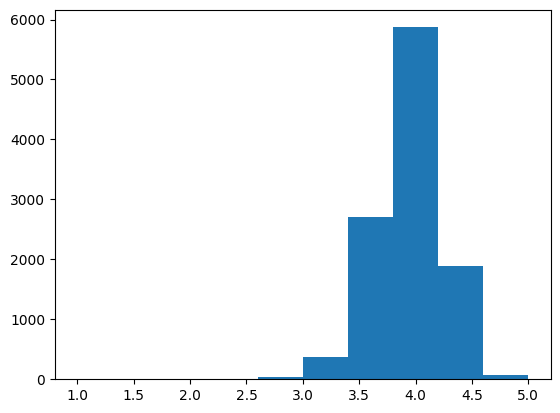

In [7]:
plt.hist(df['average_rating'])

(array([2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 7.000e+00,
        6.700e+01, 1.275e+03, 8.244e+03, 1.370e+03]),
 array([0.        , 0.16094379, 0.32188758, 0.48283137, 0.64377516,
        0.80471896, 0.96566275, 1.12660654, 1.28755033, 1.44849412,
        1.60943791]),
 <BarContainer object of 10 artists>)

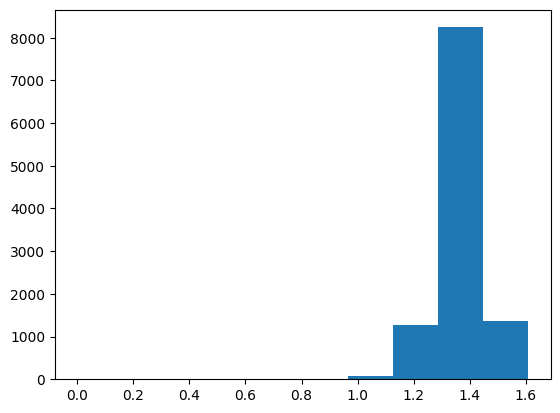

In [8]:
plt.hist(np.log(df['average_rating']))

(array([1.0164e+04, 7.3700e+02, 5.8000e+01, 5.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 6.5850e+02, 1.3160e+03, 1.9735e+03, 2.6310e+03,
        3.2885e+03, 3.9460e+03, 4.6035e+03, 5.2610e+03, 5.9185e+03,
        6.5760e+03]),
 <BarContainer object of 10 artists>)

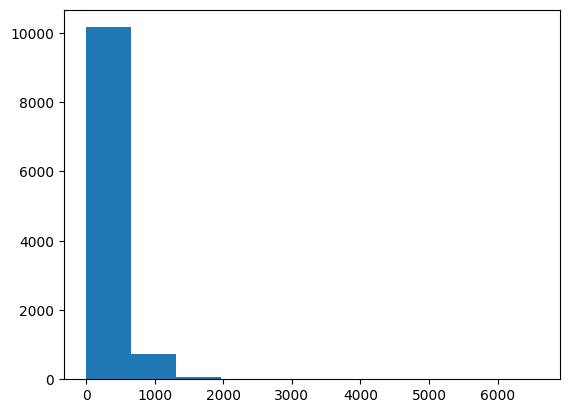

In [9]:
plt.hist(df['  num_pages'])

(array([2.400e+01, 4.500e+01, 8.900e+01, 1.950e+02, 4.060e+02, 1.958e+03,
        6.251e+03, 1.877e+03, 1.200e+02, 6.000e+00]),
 array([0.        , 0.87911819, 1.75823639, 2.63735458, 3.51647277,
        4.39559097, 5.27470916, 6.15382736, 7.03294555, 7.91206374,
        8.79118194]),
 <BarContainer object of 10 artists>)

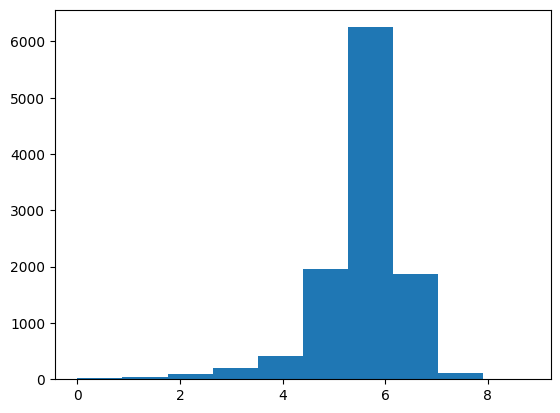

In [10]:
plt.hist(np.log(df['  num_pages']))

(array([1.09e+04, 3.80e+01, 1.30e+01, 8.00e+00, 7.00e+00, 4.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.0000000e+00, 4.5976750e+05, 9.1953400e+05, 1.3793005e+06,
        1.8390670e+06, 2.2988335e+06, 2.7586000e+06, 3.2183665e+06,
        3.6781330e+06, 4.1378995e+06, 4.5976660e+06]),
 <BarContainer object of 10 artists>)

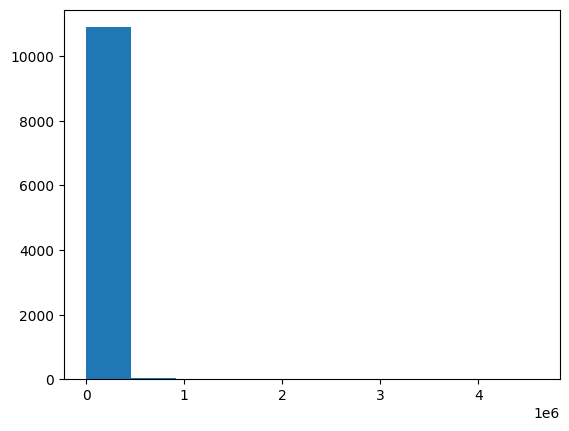

In [11]:
plt.hist(df['ratings_count'])

(array([ 286.,  770., 1530., 2132., 2296., 1991., 1247.,  558.,  130.,
          31.]),
 array([ 0.        ,  1.53410593,  3.06821187,  4.6023178 ,  6.13642374,
         7.67052967,  9.2046356 , 10.73874154, 12.27284747, 13.80695341,
        15.34105934]),
 <BarContainer object of 10 artists>)

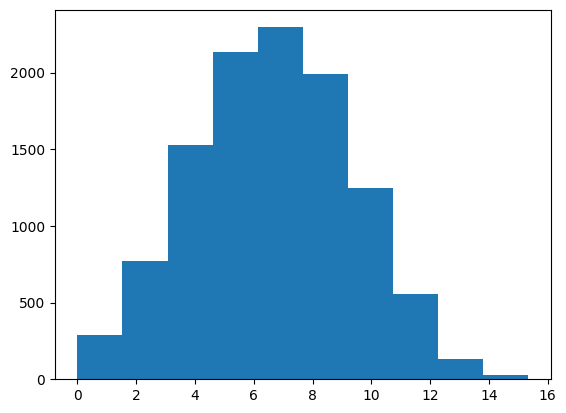

In [12]:
plt.hist(np.log(df['ratings_count']))

(array([1.0867e+04, 6.7000e+01, 1.8000e+01, 1.0000e+01, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([    0. ,  9426.5, 18853. , 28279.5, 37706. , 47132.5, 56559. ,
        65985.5, 75412. , 84838.5, 94265. ]),
 <BarContainer object of 10 artists>)

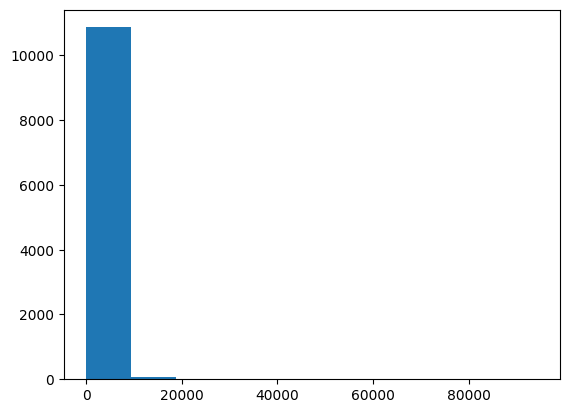

In [13]:
plt.hist(df['text_reviews_count'])

(array([ 971., 1068., 1798., 2143., 2084., 1535.,  880.,  369.,  104.,
          19.]),
 array([ 0.        ,  1.21470124,  2.42940248,  3.64410373,  4.85880497,
         6.07350621,  7.28820745,  8.5029087 ,  9.71760994, 10.93231118,
        12.14701242]),
 <BarContainer object of 10 artists>)

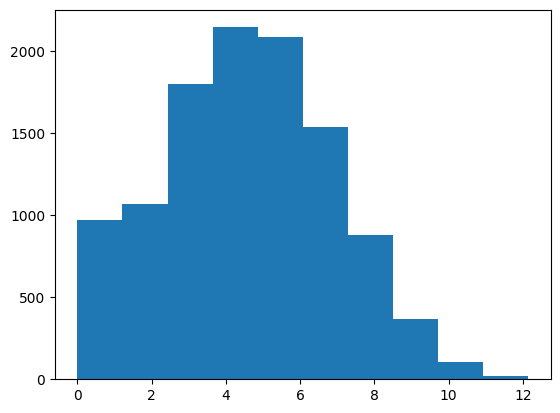

In [14]:
plt.hist(np.arcsinh(df['text_reviews_count']))

Here, we can see that average_rating seems to roughly follow a normal distribution, while all the other numerical columns seem to roughly follow a lognormal distribution. Therefore, keeping the average rating, but converting other columns to logs will likely lead to roughly normal data.

In [15]:
df_scaled=df.copy()
df_scaled['log_num_pages']=np.arcsinh(df['  num_pages'])
df_scaled['log_ratings_count']=np.arcsinh(df['ratings_count'])
df_scaled['log_text_reviews_count']=np.arcsinh(df['text_reviews_count'])

In [16]:
df_scaled=df_scaled[['bookID','title','authors','average_rating','isbn','isbn13','language_code','log_num_pages','log_ratings_count','log_text_reviews_count','publication_date','publisher']]

In [17]:
df_scaled

,bookID,title,authors,average_rating,isbn,isbn13,language_code,log_num_pages,log_ratings_count,log_text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,7.173192,15.248541,10.918392,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,7.461641,15.275598,10.975790,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,6.556780,9.446677,6.190320,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,6.768495,15.358631,11.193409,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,8.590444,11.324859,5.793023,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,6.931473,5.743013,3.689504,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,7.146773,7.356280,4.718579,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,6.721427,7.402452,5.247052,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,6.766193,7.338239,5.627634,2/27/2007,Ecco


Next, let's do a scatterplot of all the numerical columns, to see if there are any noticeable correlations (linear or not) in these columns.

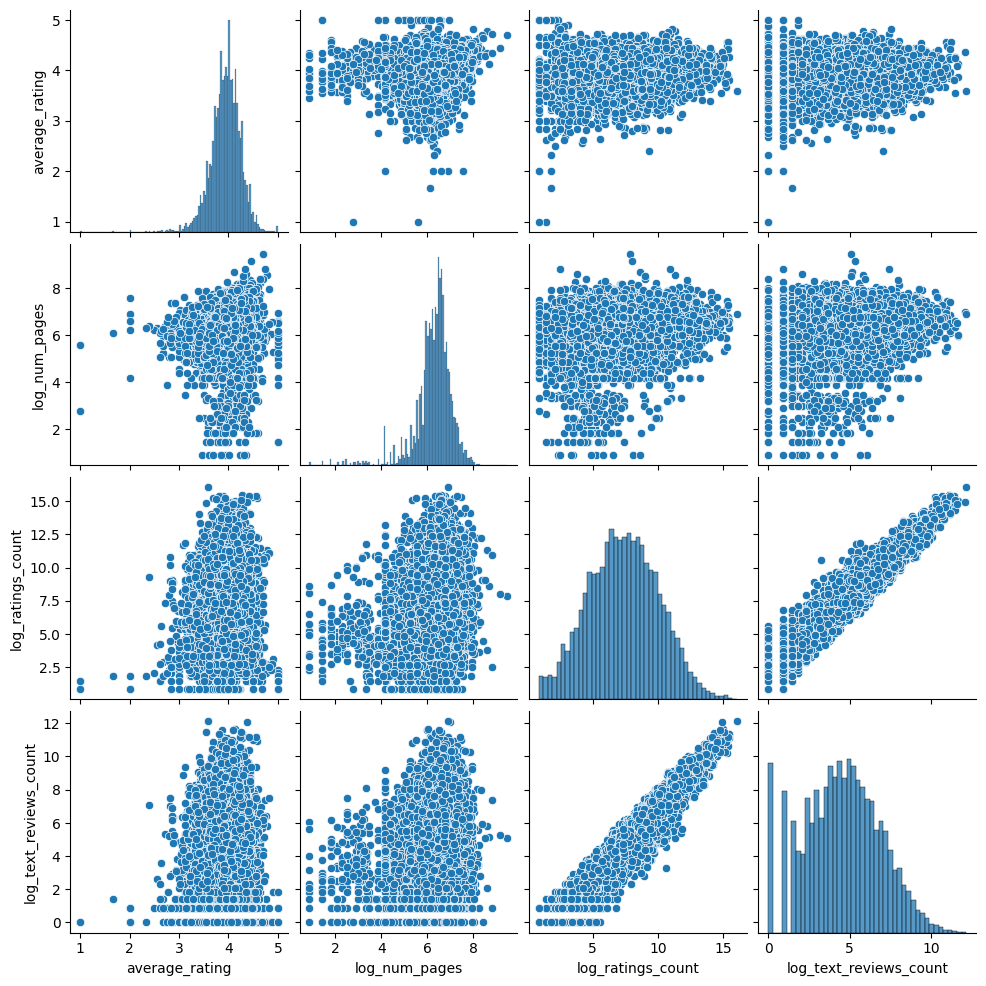

In [18]:
sns.pairplot(df_scaled[['average_rating','log_num_pages','log_ratings_count','log_text_reviews_count']])

Here, we see that the only significant correlation seems to be between log_rating_count and log_text_reviews_count, which makes sense, as we expect the number of text_reviews to be greater the more ratings there are (since each person giving a rating may or may not also leave a review, presumably with a fairly predictible probability). We will keep log_rating_count, as it seems "more normal" than it's counterpart, "log_text_reviews", which seems to suffer from insufficient data around 0.

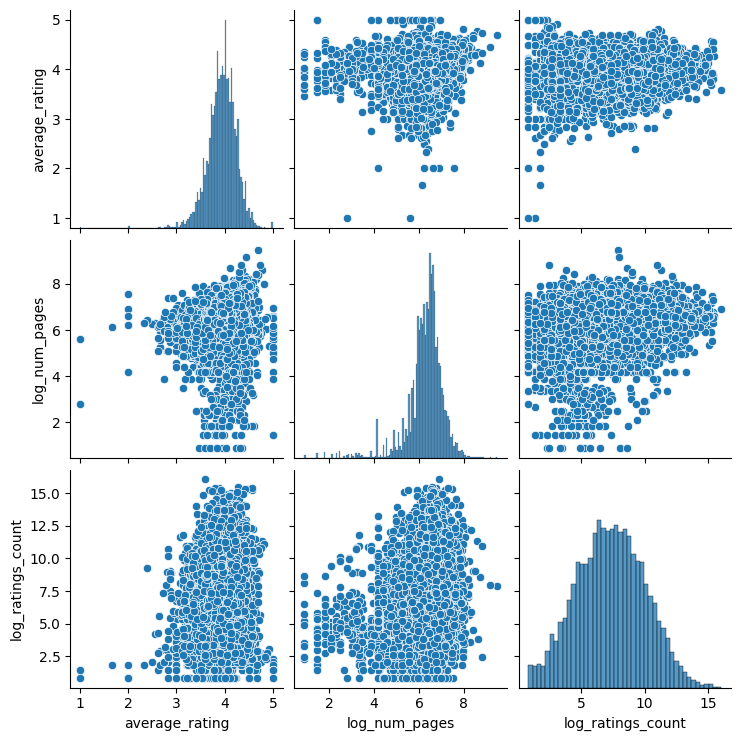

In [19]:
df_purified=df_scaled[['average_rating','log_num_pages','log_ratings_count']]
sns.pairplot(df_purified)

Now that we have fairly normal data,  let's plot a correlation table of our data.

<Axes: >

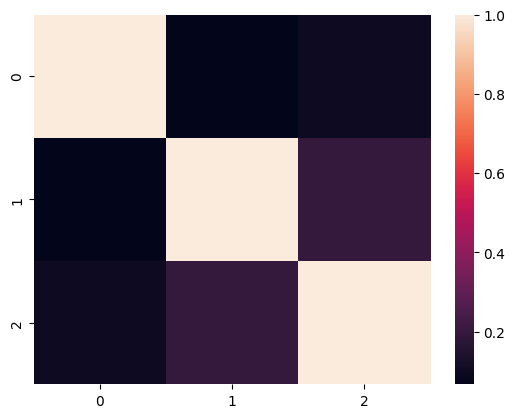

In [20]:
sns.heatmap(np.corrcoef(df_purified,rowvar=False))

Now, we may want to analyse the textual columns, to see if there may be any ways of using this data as a part of our analysis.

In [21]:
print(len(df['title'].unique())/len(df['title']))

0.9309999088506061


In [22]:
print(len(df['authors'].unique())/len(df['authors']))

0.5968462309725641


In [23]:
print(len(df['language_code'].unique())/len(df['language_code']))

0.0023698842402698024


We see here that title has 93% as many unique values as values, indicating that there is not that much redundance in titles.
Authors has 59% as many, indicating some redundance. Since authors are grouped into combinations, it may therefore be worthwile to split them into author1,author2, etc...
Languages are unsuprisingly very "un-redundant". Let's plot them here.

In [24]:
print(df['language_code'].unique())

['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor'
 'tur' 'gla' 'ale']


We see, here, that english is split up into 4 languages, as eng, en-US, en-GB, and eng-CAN.
Perhaps it would be better to consolidate these into eng, since, for all other languages, the language in that field would determine the language in the title.

In [25]:
def language_trim(lang):
    if(lang in ['en-US','en-GB','en-CAN']):
        return 'eng'
    return lang
language_trim=np.vectorize(language_trim)

In [26]:
df['language_code']=language_trim(df['language_code'])

C:\Users\joelb\AppData\Local\Temp\ipykernel_20220\3069049199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language_code']=language_trim(df['language_code'])


In [27]:
df['language_code'].unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'enm', 'en-CA', 'ger', 'jpn',
       'ara', 'nl', 'zho', 'lat', 'por', 'ita', 'rus', 'msa', 'glg',
       'wel', 'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)